<a href="https://colab.research.google.com/github/julianrod04/git-example-recitation/blob/main/DS_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Lab: Lab 1

Submit:

A read-only link to your colab notebook, executed and saved (so that we can run it, but don't necessarily have to, to see your results).

For any questions that require written explanation, please use Markdown - it is a lot easier for us to read than comments in the code.

**If you used any AI help, please describe how you used it and what you used.**

**Goals of this Lab:**
1.  Practice with Pandas, Numpy and Data Exploration.
2.  Training vs testing error
3.  Review important results from probability, such as the CLT.


In [ ]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility
rng = default_rng(42)

# Problem 1

Download from Canvas/Files the dataset ``PatientData.csv``. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Julian
drive_file = '/content/drive/MyDrive/ECE 460J/Labs/Lab1'

In [ ]:
# Andriy
drive_file = '/content/drive/MyDrive/ECE460J/Labs/Lab1/Names/Names'

In [ ]:
# Nathan
drive_file = '/content/drive/MyDrive/2024-2025/Labs/Lab1'

In [ ]:
# read data
file_path = drive_file + '/PatientData.csv'

data = pd.read_csv(file_path, header= None)

### Part 1:
There are 452 patients and 279 features

In [ ]:
# Part 1
data.shape

(452, 280)

### Part 2:
Age: Ranges

Gender: Mommy Daaddy Julian Nathan

Height in cm

Blood Pressure


In [ ]:
# Part 2
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


### Part 3:

In [ ]:
data.replace("?", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

print(data.head())


   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]


### Part 4:

The three most important features are:
90    0.368876
4     0.323879
92    0.313982
Name: 279, dtype: float64


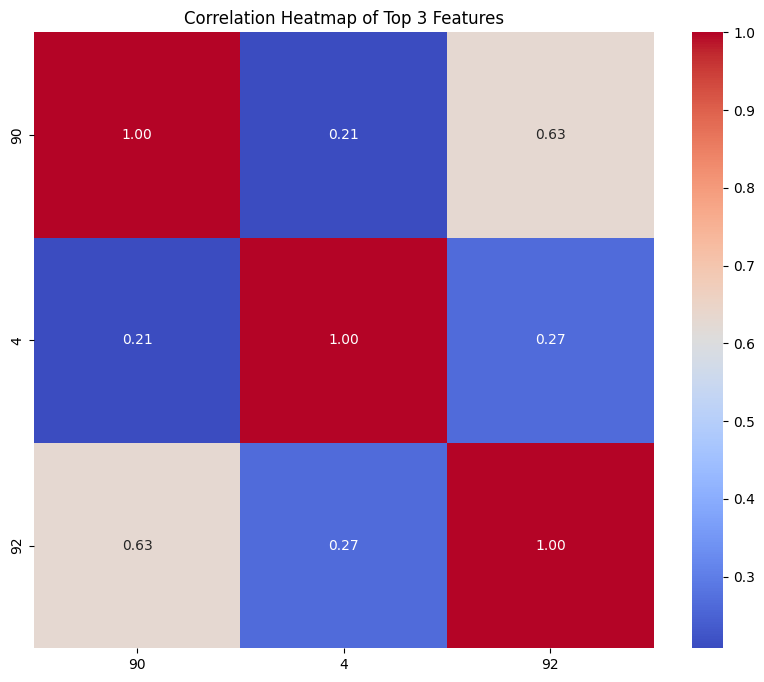

In [ ]:
correlation_matrix = data.corr()
target_column = data.columns[-1]
correlation_with_target = correlation_matrix[target_column].drop(target_column)
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)


print("The three most important features are:")
print(sorted_correlation.head(3))

plt.figure(figsize=(10, 8))
sns.heatmap(data[sorted_correlation.head(3).index].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 3 Features')
plt.show()

##Answer Part 4
To test which features are most influential on the dataset we can generate a correlation matrix that will "heatmap" the strongest features to the outcome. Looking at the correlation coefficients and the mapped colors we will be able to tell visually and analytically

# Problem 2

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the file Names.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Part 1. Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX.

Part 2. Write a program that on input Name returns the frequency for men and women of the name Name.

Part 3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency.

Part 4. Find all the names that used to be more popular for one gender, but then became more popular for another gender.

•(Optional) Find something cool about this data set.

In [ ]:
#Part 1:
def topNames(k, XXXX):
    file_name = drive_file + f'/Names/Names/yob{XXXX}.txt'
    data = pd.read_csv(file_name, header=None)
    return data.head(k)

print(topNames(5, 1880))

#Part 2:
def countNames(name):
    male_count = 0
    female_count = 0
    counts = []

    for year in range(1880, 2016):
        file_name = drive_file + f'/Names/Names/yob{year}.txt'
        data = pd.read_csv(file_name, header=None, names = ['Names', 'Gender', 'Count'])

        if name in data['Names'].values:
            male_count += data[(data['Names'] == name) & (data['Gender'] == 'M')]['Count'].sum()
            female_count += data[(data['Names'] == name) & (data['Gender'] == 'F')]['Count'].sum()
    counts.append(['Male', male_count])
    counts.append(['Female', female_count])

    return counts

print(countNames('Riley'))


#Part 3:
def countNamesYear(name):
    counts = []
    for year in range(1880, 2016):
        file_name = drive_file + f'/Names/Names/yob{year}.txt'
        data = pd.read_csv(file_name, header=None, names=['Name', 'Gender', 'Count'])
        if name in data['Name'].values:
            count = data[data['Name'] == name]['Count'].values[0]
        else:
            count = 0
        counts.append([year, count])
    return counts

print(countNamesYear('Leta'))


#Part 4:
#def morePopGender():

           0  1     2
0       Mary  F  7065
1       Anna  F  2604
2       Emma  F  2003
3  Elizabeth  F  1939
4     Minnie  F  1746
[['Male', 89585], ['Female', 87347]]
[[1880, 18], [1881, 21], [1882, 15], [1883, 25], [1884, 22], [1885, 32], [1886, 24], [1887, 32], [1888, 41], [1889, 59], [1890, 63], [1891, 45], [1892, 56], [1893, 55], [1894, 65], [1895, 73], [1896, 76], [1897, 78], [1898, 95], [1899, 60], [1900, 93], [1901, 74], [1902, 82], [1903, 83], [1904, 86], [1905, 98], [1906, 81], [1907, 87], [1908, 83], [1909, 96], [1910, 97], [1911, 98], [1912, 130], [1913, 130], [1914, 153], [1915, 224], [1916, 219], [1917, 196], [1918, 233], [1919, 183], [1920, 225], [1921, 205], [1922, 201], [1923, 204], [1924, 183], [1925, 195], [1926, 225], [1927, 229], [1928, 214], [1929, 191], [1930, 213], [1931, 162], [1932, 159], [1933, 167], [1934, 169], [1935, 149], [1936, 154], [1937, 125], [1938, 146], [1939, 142], [1940, 134], [1941, 138], [1942, 112], [1943, 133], [1944, 135], [1945, 104], [194

# Problem 3

We looked at the MNIST data set in class (see the notebook in ``pages`` in Canvas). Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision, and we will see it again.

This exercise is simple exercise, and an opportunity to play around with this data set.

**Parts 1 to 7: Nothing to submit!** just run through the notebook we saw in class and try to make sure you understand all the commands.

Part 1. Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

**Only submit your answer to this part**

Part 8. Fix the depth of the tree. For this example, use depth=6 (nothing special about the number 6, just to illustrate the concept). Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 20,0000, 60,000 training points, always computing testing score by evaluating on the 10,000 testing points. Plot this trend.  Try to explain what you are seeing.  


# Problem 4

We now turn to a somewhat more sophisticated data set: CIFAR10.

Load the data using:
```
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. Figure out how to display some of the images from CIFAR10.

Part 3: Reshape X_train into a matrix X_tr so that each row is a data point.
 What are the dimensions of X_train?

Part 4: Generate decision trees of depth 1 to 15, and for each, compute the training accuracy and the testing accuracy.

If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
The label "airplane" appears 5000 times in the training set
The label "automobile" appears 5000 times in the training set
The label "bird" appears 5000 times in the training set
The label "cat" appears 5000 times in the training set
The label "deer" appears 5000 times in the training set
The label "dog" appears 5000 times in the training set
The label "frog" appears 5000 times in the training set
The label "horse" appears 5000 times in the training set
The label "ship" appears 5000 times in the training set
The label "truck" appears 5000 times in the training set


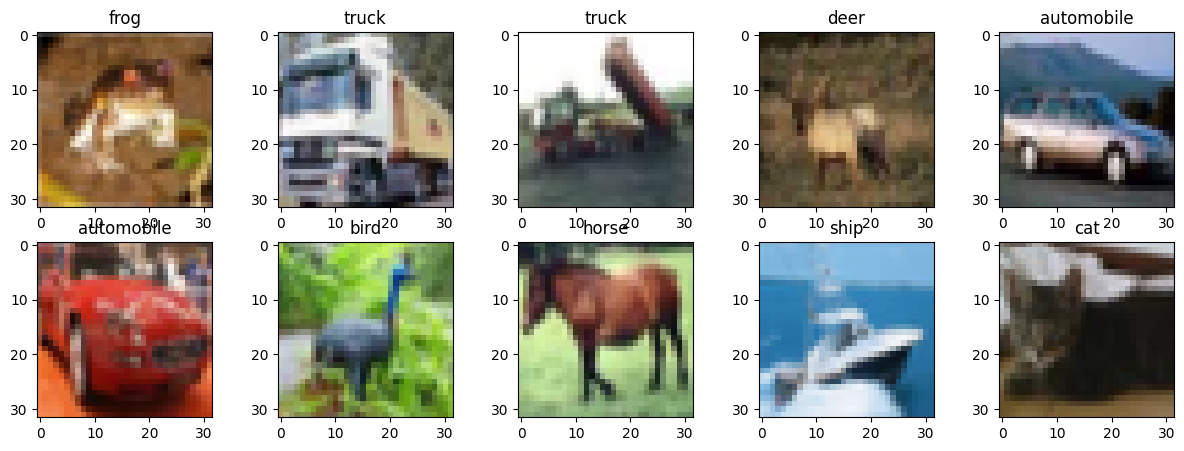

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Part 1:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

label_counts = np.bincount(y_train.flatten())
for i, count in enumerate(label_counts):
    print(f'The label "{labels[i]}" appears {count} times in the training set')

#Part 2:
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(labels[y_train[i][0]])
    plt.show()

display_images(X_train, labels, num_images=10)

# The next two problems are optional, but recommended

We will be generating lots of random data sets in this class, in order to test the behavior of machine learning algorithms.

So it's useful to know how to generate random data, and display it.

### Problem 5 (Optional, recommended)

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}2 & 0.8\\0.8 & 3\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


### Problem 6: Central Limit Theorem (Optional, recommended)

Back in EE351K you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. **Note**: To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.